In [2]:
%load_ext autoreload
%autoreload 2

## Imports and Installations

In [3]:
import pandas as pd

In [4]:
from underspecification import UnderspecificationAnalysis

2022-10-25 16:45:46.578246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 16:45:46.578281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Gather and Process Data

In [5]:
X = pd.read_csv('/large/metabric/expression_with_gene_ids_min_max_no_pam50.csv.gz')
X.set_index('Sample ID',inplace=True)
X.head()

,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,0.121975,0.215056,0.137268,0.319299,0.299318,0.379480,0.412660,0.361855,0.101269,0.172184,...,0.221594,0.299784,0.362357,0.225769,0.367554,0.132938,0.328175,0.573906,0.539070,0.147249
MB-0346,0.192559,0.042307,0.204485,0.103171,0.315292,0.391824,0.544226,0.372350,0.087123,0.164404,...,0.156303,0.516268,0.489675,0.363120,0.457905,0.155936,0.121523,0.483270,0.411438,0.224434
MB-0386,0.129016,0.302035,0.104212,0.478857,0.307694,0.265761,0.191160,0.214396,0.124491,0.135946,...,0.167134,0.210737,0.420390,0.164456,0.268026,0.169930,0.358189,0.616131,0.515510,0.124535
MB-0574,0.186569,0.204583,0.084922,0.155657,0.259502,0.225779,0.276242,0.363504,0.156255,0.174428,...,0.177223,0.211609,0.669651,0.530200,0.548744,0.054719,0.364991,0.480279,0.564949,0.158037
MB-0185,0.110777,0.337835,0.133802,0.265908,0.555257,0.349347,0.222268,0.381949,0.058114,0.111793,...,0.382424,0.450318,0.644640,0.280082,0.305045,0.135671,0.259829,0.531486,0.503557,0.165486


In [6]:
df = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
# df.set_index('Sample ID')[['Pam50 + Claudin-low subtype']].to_csv('data/metabric/pam50_claudinlow_subtype.csv')
df = df.loc[df['Pam50 + Claudin-low subtype']!='NC']
df.set_index('Sample ID',inplace=True)
y = df['Pam50 + Claudin-low subtype']
y.head()

Sample ID
MB-0000    claudin-low
MB-0002           LumA
MB-0005           LumB
MB-0006           LumB
MB-0008           LumB
Name: Pam50 + Claudin-low subtype, dtype: object

In [7]:
Xy = X.join(y).dropna()
X = Xy.drop(['Pam50 + Claudin-low subtype'], axis=1)
y = Xy['Pam50 + Claudin-low subtype']

## Analyze Underspecification

In [8]:
ua = UnderspecificationAnalysis(output_dir='data')

Running PCA Analysis ...
Running K-means Analysis ...
Writing Cluster Analysis ...
-----[ COMPLETE ]-----
Check /data/data_analysis for the results.


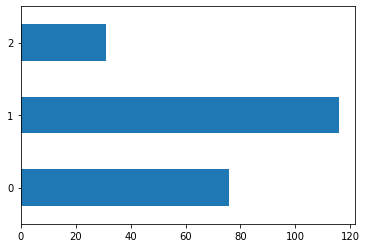

In [9]:
Xy_filtered = ua.analyze_dataset(X, y, subdirectory='data_analysis', cluster_focus='Her2')

In [10]:
ua.create_clustering_shifted_datasets(X, y, Xy_filtered, 
                                      num_clusters=3, 
                                      split_ratio=[0.7,0.1,0.2],
                                      cluster_focus='Her2', 
                                      subdirectory='indices', 
                                      num_shifted_sets=50
)

Creating shifted sets ...
Writing out sets ...
-----[ COMPLETE ]-----
Check /data/indices for the results.


In [13]:
ua.evaluate_shifted_sets(X, y, subdirectory='results', random_state=0)

Evaluating models ...
    Evaluating: data/indices/1,True/index_df_14.csv
    Evaluating: data/indices/1,True/index_df_46.csv
    Evaluating: data/indices/1,True/index_df_49.csv
    Evaluating: data/indices/1,True/index_df_6.csv
    Evaluating: data/indices/1,True/index_df_11.csv
    Evaluating: data/indices/1,True/index_df_9.csv
    Evaluating: data/indices/1,True/index_df_30.csv
    Evaluating: data/indices/1,True/index_df_34.csv
    Evaluating: data/indices/1,True/index_df_47.csv
    Evaluating: data/indices/1,True/index_df_28.csv
    Evaluating: data/indices/1,True/index_df_3.csv
    Evaluating: data/indices/1,True/index_df_17.csv
    Evaluating: data/indices/1,True/index_df_41.csv
    Evaluating: data/indices/1,True/index_df_31.csv
    Evaluating: data/indices/1,True/index_df_45.csv
    Evaluating: data/indices/1,True/index_df_32.csv
    Evaluating: data/indices/1,True/index_df_18.csv
    Evaluating: data/indices/1,True/index_df_36.csv
    Evaluating: data/indices/1,True/index_df_

KeyboardInterrupt: 

In [20]:
ua.analyze_underspecification(filename='rf_results.csv', subdirectory='results')

/home/jupyter-jtang46/underspecification/under_pipe/underspecification.py:376: PerformanceWarning: indexing past lexsort depth may impact performance.
  f = source.loc[index,'f1-score (shifted)']
/home/jupyter-jtang46/underspecification/under_pipe/underspecification.py:377: PerformanceWarning: indexing past lexsort depth may impact performance.
  r = source.loc[index,'f1-score (unshifted)']
/home/jupyter-jtang46/underspecification/under_pipe/underspecification.py:378: PerformanceWarning: indexing past lexsort depth may impact performance.
  source.loc[index,'rank'] = stats.rankdata(-(f+r)/2)
/home/jupyter-jtang46/underspecification/under_pipe/underspecification.py:379: PerformanceWarning: indexing past lexsort depth may impact performance.
  source.loc[index,'avg f1-score'] = ((f+r)/2).values #2*(f*r)/(f+r)
/home/jupyter-jtang46/underspecification/under_pipe/underspecification.py:376: PerformanceWarning: indexing past lexsort depth may impact performance.
  f = source.loc[index,'f1-sco